### Notebook based on 'A Complete Tutorial to Learn Data Science with Python from Scratch
#### Analytics Vidhya

Webpage stored locally [here](file:///C:/Users/danielle.leong/Desktop/sp.html): 

As of 01/09/2017 14:40 all packages have been updated via [awesome method](http://stackoverflow.com/questions/2720014/upgrading-all-packages-with-pip).

In [1]:
%pylab inline
# numpy as np
# matplotlib as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("C:/Users/danielle.leong/python/edu/train.csv") # reading from csv

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

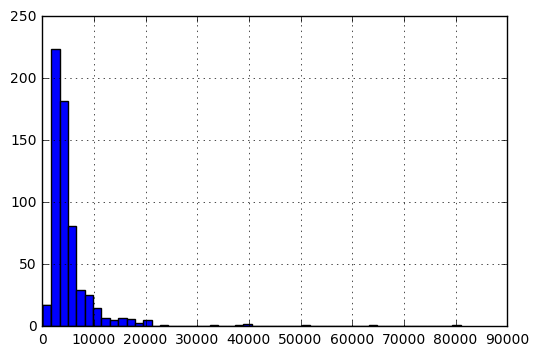

In [6]:
df['ApplicantIncome'].hist(bins=50) # histogram
# using 50 bins as std...?

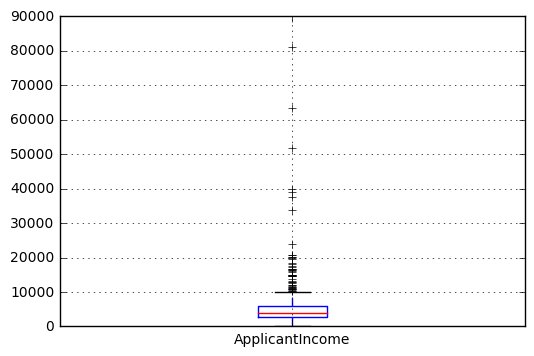

In [7]:
df.boxplot(column='ApplicantIncome') # box and whisker
# here outliers are indicated
# outliers shown based on distance in terms of interquartile range (IQR)

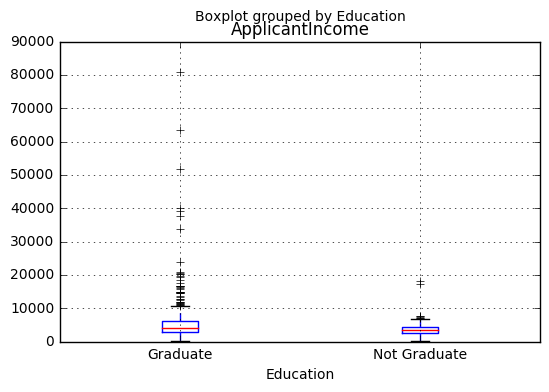

In [8]:
df.boxplot(column='ApplicantIncome', by = 'Education')

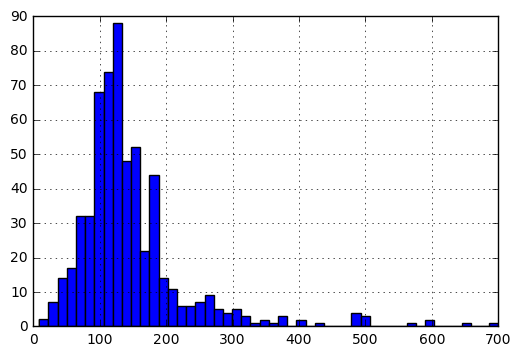

In [9]:
df['LoanAmount'].hist(bins=50)

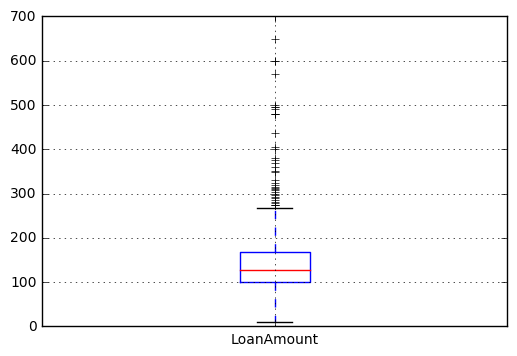

In [10]:
df.boxplot(column='LoanAmount')

The following cell will refer to [this](https://web.archive.org/web/20160509022507/http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/) page, regarding methods for using Pandas module in python

An archived page is used due to inability to scroll on current site hosted (?) who knows why...

Anyhow, the goal is to create a pivot table like the one below, from excel:
![Alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/01/10.-pivot_table3.png)


The code snippet below refers to *lambda*, a short function construct that takes on expression.

Read more in Python 3.x documentation [here](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)

In [11]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


A quick look at the [`aggfunc`](http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.pivot_table.html) used here:
```python
aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
```
Recall from earlier, the data in `Loan_Status` was composed of either a `Y` or an `N`. What `map()` is doing, is mapping those to boolean values.

Y => 1

N => 0




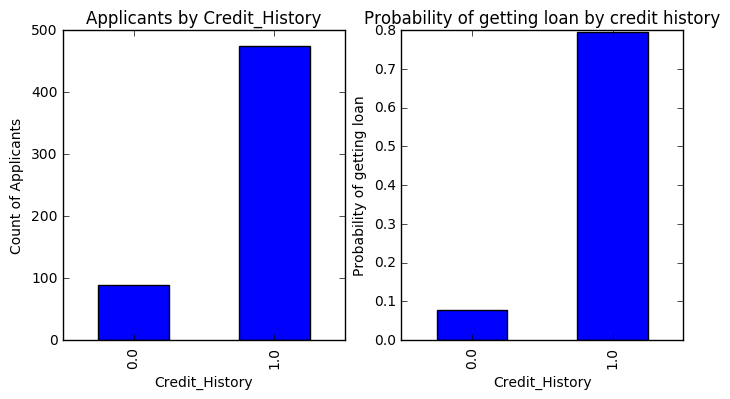

In [12]:
# import matplotlib.pyplot as plt --optional since we're already working in Pylab env.
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121) # see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

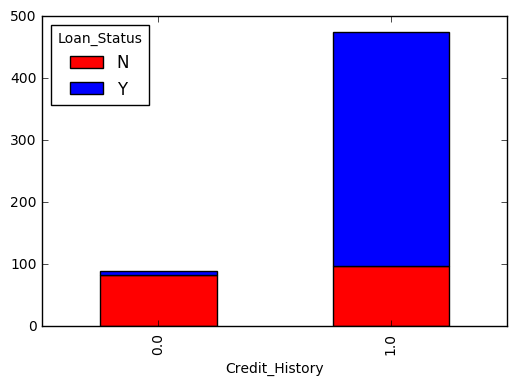

In [13]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Also I asked a question on stack overflow, located [here](http://stackoverflow.com/questions/41172448/why-wont-barchart-in-pandas-stack-different-values)

Suggestion from SO:

In [14]:
df['loan_status_word'] = df['Loan_Status'].map({'N':0, 'Y':1})
# must map x -> y, where x already exists
# counts = df['loan_status_word'].value_counts()
# counts

In [15]:
df['loanY'] = df['Loan_Status'].map({'N':0, 'Y':1})
df['loanN'] = df['Loan_Status'].map({'N':1, 'Y':0})

This was the original suggestion, was getting a error earlier but now it's gone somehow, probably a typo????

...or maybe I didn't run my entire file first...also I changed the `aggfunc` to `sum`

In [16]:
df.pivot_table(values=['loanY', 'loanN'], 
               index=['Credit_History', 'Gender'], 
               columns = 'Loan_Status', 
               aggfunc = 'size')

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

In [17]:
df['loan_status_word'] = df['Loan_Status'].map({'N':1, 'Y':1})

In [18]:
pvt2 = df.pivot_table(values='loan_status_word', 
               index=['Credit_History', 'Gender'], 
               columns = 'Loan_Status', 
               aggfunc = 'sum')

In [19]:
ndim(df['loan_status_word'])

1

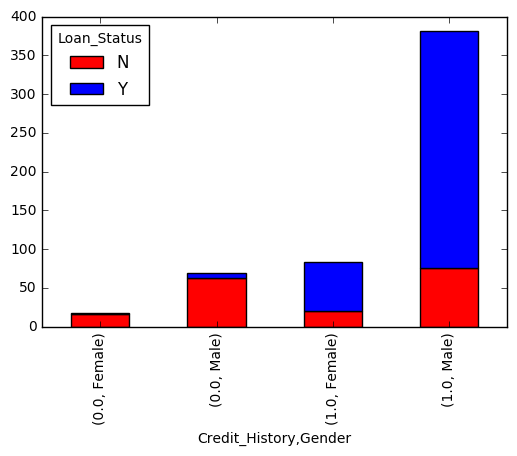

In [20]:
pvt2.plot(kind = 'bar', stacked = True, color = ['red', 'blue'], grid = False)


# Data munging with Pandas
### Methods for filling missing values

Note: general methods, not based on learning model

In [21]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loan_status_word      0
loanY                 0
loanN                 0
dtype: int64

In [22]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

### A note on possible methods
Here's an example of what can be done, plus my stupid notes.
```python
# THE MISSING VALUES CELL
# maybe I shouldn't run this...at all
# To fill by mean:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
# causes an error in below cell--nono, actually something else is messing it up
# no no actually everything is fine up until problem cell
```

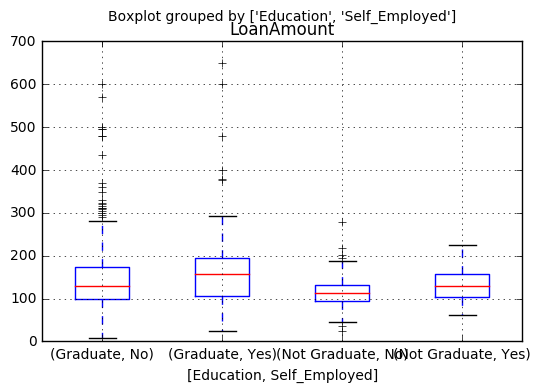

In [23]:
df.boxplot(column = 'LoanAmount', by = ['Education', 'Self_Employed'])
# did this based on seeing figure from site

In [24]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
# most values are no (86%) ergo with high likelihood it can be said the missing are 'No'
df['Self_Employed'].fillna('No', inplace = True)

In [26]:
table = df.pivot_table(values = 'LoanAmount',
                      index = 'Self_Employed',
                      columns = 'Education',
                      aggfunc = np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [27]:
# returns values of pivot table
def fage(x): 
    return table.loc[x['Self_Employed'], x['Education']]
# to replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis = 1), inplace = True)

# ~~The PROBLEM CELL~~
Maybe I should be running this *INSTEAD* of the missing values cell
```python
# to replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis = 1), inplace = True)
```

->> Conclusion, yes, that ***is*** the problem

**Also** be sure to run all the cells preceding this cell

A quick breakdown: 
- Working with the 'LoanAmount' col of df
- filling in the na values
  - looking at the spots in df where there are nan vals in the 'LoanAmount' col
  - returning the following table (run cell below to see)
    - `table.loc[df['Self_Employed'], df['Education']]`
      - indexing by label
      - creates table with all values for 'Self_Employed' and all vals for 'Education' along index and cols respectively
      - intersections indicate values, based on original table
  - `inplace = True` directly modifying obj

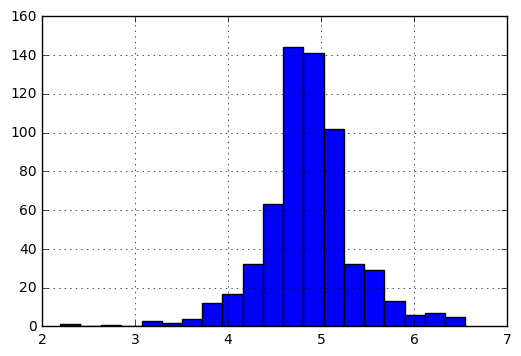

In [28]:
# log transformation to reduce effect of extreme values as much as possible
# natural log
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

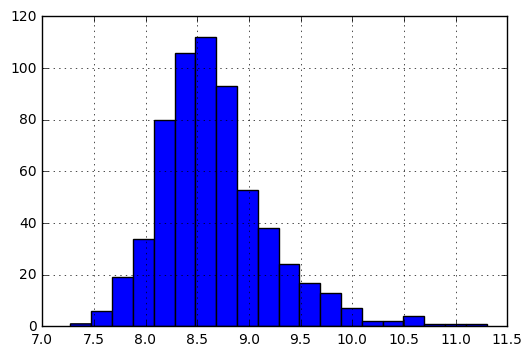

In [29]:
# combining applicant income and coapplicant income
# since some have low income but strong coapplicants
# >> total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [30]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [31]:
# ~81% are male, ergo we can say it is likely the missing applicants are male
# the 13 missing values are ~2% of the entire set, so there isn't a large concern on its effect
df['Gender'].fillna(value = 'Male', inplace=True)
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [32]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
df['Married'].fillna(value = 'Yes', inplace = True)
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [34]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [35]:
df['Dependents'].fillna(value = '0', inplace = True) # categories are str
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df['Loan_Amount_Term'].mean()

342.0

In [39]:
df['Loan_Amount_Term'].fillna(value = 360, inplace = True) # discrete int values, chose closest to mean
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [41]:
df['Credit_History'].fillna(value = 1.0, inplace = True) #if inplace = True, operations on original mtx
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [42]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_status_word     0
loanY                0
loanN                0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Building a Predicting Model
For this we will use the `sklearn` module

`sklearn` requires all numeric inputs, thus categories must be converted to numerical data

This is done below.
[LabelEncoder Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [43]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder() # creating an estimator; obj of estimator class
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
loan_status_word       int64
loanY                  int64
loanN                  int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

### Defining generic classification function

Read more on the [here](https://www.analyticsvidhya.com/blog/2015/08/common-machine-learning-algorithms/)

In [44]:
# import models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold # for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# generic fxn for making classification model and processing accessing performance
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome]) # fit model
    predictions = model.predict(data[predictors]) # make predictions on training set
    
    # print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    # k-fold cross validatiom, 5 folds
    kf = KFold(data.shape[0], n_folds = 5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:]) # filter training data
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        
        # record error from each run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
        print("Cross-Validation Score: %s" % "{0:.3%}".format(np.mean(error)))
        
        # fit model (again) so it can be referred to outside fxn
        model.fit(data[predictors], data[outcome])

C:\Users\danielle.leong\AppData\Local\Continuum\Anaconda3\Lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression
Note: taking in all variables may result in overfitting the model
regression: relation of variables to a target variable 

[wiki](https://en.wikipedia.org/wiki/Regression_analysis)

In [45]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.488%
Cross-Validation Score: 78.455%
Cross-Validation Score: 79.133%
Cross-Validation Score: 80.691%
Cross-Validation Score: 80.946%


In [46]:
# diff comb. of vars
predictor_var = ['Credit_History', 'Education', 'Married', 'Self_Employed', 'Property_Area']
classification_model(model, df, predictor_var, outcome_var)
# no major diff

Accuracy: 80.945%
Cross-Validation Score: 80.488%
Cross-Validation Score: 78.455%
Cross-Validation Score: 79.133%
Cross-Validation Score: 80.691%
Cross-Validation Score: 80.946%


## Decision Tree
note: tends to higher accuracy than logistic regression

- works by splitting based on categories
- can also work for continuous target data
- using all data risks overfitting

In [47]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'Gender', 'Married', 'Education']
classification_model(model, df, predictor_var, outcome_var)
# according to side it should be ~ 82%

Accuracy: 80.945%
Cross-Validation Score: 80.488%
Cross-Validation Score: 78.455%
Cross-Validation Score: 79.133%
Cross-Validation Score: 80.691%
Cross-Validation Score: 80.946%


In [48]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount_log']
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 88.925%
Cross-Validation Score: 73.171%
Cross-Validation Score: 71.138%
Cross-Validation Score: 70.461%
Cross-Validation Score: 70.528%
Cross-Validation Score: 69.046%


## Random Forest
algorithm for solving classification problem
- can work with all features
- returns feature importance mtx
  - can be used to select features

In [49]:
model = RandomForestClassifier(n_estimators = 100) # 10 estimators per var?
predictor_var = ['Gender', 'Married', 'Dependents', 
                 'Education', 'Self_Employed', 'Loan_Amount_Term',
                 'Credit_History', 'Property_Area', 'LoanAmount_log',
                 'TotalIncome_log']
classification_model(model, df, predictor_var, outcome_var)
# site reads as 100% accuracy, x-val 78.179%

Accuracy: 100.000%
Cross-Validation Score: 77.236%
Cross-Validation Score: 75.610%
Cross-Validation Score: 77.236%
Cross-Validation Score: 78.049%
Cross-Validation Score: 78.505%


An accuracy of 100% is the *"ultimate case of overfitting"* and can be fixed by:
1. reducing number of predictors
1. tuning model parameters

note: feature importances are based on ['Gini index'](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#one)

In [50]:
# creating series with feature importances
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print(featimp)

TotalIncome_log     0.273638
Credit_History      0.271003
LoanAmount_log      0.220038
Dependents          0.051117
Property_Area       0.049102
Loan_Amount_Term    0.042426
Married             0.026042
Education           0.023594
Self_Employed       0.021575
Gender              0.021465
dtype: float64


In [51]:
# modifying model based on top 5 influences
model = RandomForestClassifier(n_estimators = 25,
                               min_samples_split = 25,
                               max_depth = 7, max_features = 1)
predictor_var = ['Credit_History', 'TotalIncome_log', 'LoanAmount_log', 'Dependents', 'Property_Area']
classification_model(model, df, predictor_var, outcome_var)
# tut predicts 82.899%, x-val: 81.461 %
# each run will yield slightly different results due to randomisation
# generally out/p values will fall 'within ballpark'

Accuracy: 82.736%
Cross-Validation Score: 78.862%
Cross-Validation Score: 76.829%
Cross-Validation Score: 78.862%
Cross-Validation Score: 79.878%
Cross-Validation Score: 80.132%


#### important notes: 
1. more complex models don't ensure better results
1. avoid modeling w/o knowning concept behind model
  - risk overfitting -> less able to interpret model
1. [feature engineering](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#four) is crucial for creating good model


# The END
## And now some information on correlation

In [52]:
df.corr() # correlation coeff

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_status_word,loanY,loanN,LoanAmount_log,TotalIncome,TotalIncome_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106096,-0.074030,0.009170,-0.025752,0.017987,NaN,0.017987,-0.017987,0.142339,0.093191,0.167285
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146279,-0.100912,0.010938,0.004257,0.091478,NaN,0.091478,-0.091478,0.179366,0.083319,0.151527
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.162710,-0.103864,-0.040160,-0.000244,0.010118,NaN,0.010118,-0.010118,0.155968,0.125590,0.112812
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.173683,-0.073928,-0.073658,-0.065243,-0.085884,NaN,-0.085884,0.085884,-0.152593,-0.161362,-0.204861
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.120030,-0.033739,-0.001550,-0.030860,-0.003700,NaN,-0.003700,0.003700,0.115678,0.113000,0.176709
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565940,-0.046531,-0.018615,-0.009500,-0.004710,NaN,-0.004710,0.004710,0.436463,0.893037,0.717829
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.188128,-0.059383,0.011134,0.010522,-0.059187,NaN,-0.059187,0.059187,0.204967,0.342781,0.383827
LoanAmount,0.106096,0.146279,0.162710,-0.173683,0.120030,0.565940,0.188128,1.000000,0.038536,-0.000630,-0.048304,-0.031618,NaN,-0.031618,0.031618,0.895868,0.620540,0.688600
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.038536,1.000000,-0.004705,-0.076120,-0.022549,NaN,-0.022549,0.022549,0.087421,-0.070917,-0.056044
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000630,-0.004705,1.000000,0.001963,0.540556,NaN,0.540556,-0.540556,-0.018373,-0.012563,0.020791


More on correlation [here](http://www.slideshare.net/EricMarsden1/modelling-correlations-using-python)

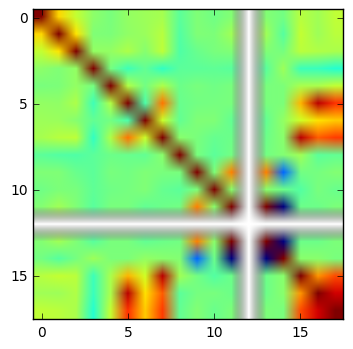

In [53]:
imshow(df.corr())